In [1]:
import rebound
import reboundx
from reboundx import constants
import numpy as np

In [2]:
sim = rebound.Simulation()
sim.add(["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto"])

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
Searching NASA Horizons for 'Pluto'... Found: Pluto Barycenter (9).


In [3]:
sim.convert_particle_units('AU', 'day', 'kg')
sim.save("test.bin")

In [4]:
sim = rebound.Simulation.from_file("test.bin")

old_sim = rebound.Simulation()
old_sim.G = 1.4880826e-34
o = sim.calculate_orbits()

old_sim.add(sim.particles[0])
for i in range(len(o)):
    if i==0:
        fac = 1.-1e-5
    else:
        fac = 1.
    old_sim.add(m=sim.particles[i+1].m,a=o[i].a,e=fac*o[i].e,inc=o[i].inc,omega=o[i].omega,Omega=o[i].Omega,f=o[i].f)

old_sim.integrator = "whfast"
old_sim.dt = 8.

old_sim.move_to_com()

rebx = reboundx.Extras(old_sim)
gr = rebx.add("gr_potential")
gr.params["c"] = constants.C

In [5]:
times = np.arange(1,1.e5*365.,1000)

In [6]:
old_x = np.empty(0)
for t in times:
    old_sim.integrate(t)
    old_x = np.append(old_x,old_sim.particles[1].x)

In [7]:
sim = rebound.Simulation.from_file("test.bin")
sim.move_to_com()

new_sim = rebound.Simulation()
new_sim.G = 1.4880826e-34
o = sim.calculate_orbits()

new_sim.add(sim.particles[0])
for i in range(len(o)):
    if i==0:
        fac = 1.-1e-5
    else:
        fac = 1.
    new_sim.add(m=sim.particles[i+1].m,a=o[i].a,e=fac*o[i].e,inc=o[i].inc,omega=o[i].omega,Omega=o[i].Omega,f=o[i].f)

new_sim.integrator = "whfast"
new_sim.dt = 8.

new_sim.move_to_com()

rebx = reboundx.Extras(new_sim)
gr = rebx.add("gr_potential")
gr.params["c"] = constants.C

In [8]:
new_x = np.empty(0)
for t in times:
    new_sim.integrate(t)
    new_x = np.append(new_x,new_sim.particles[1].x)

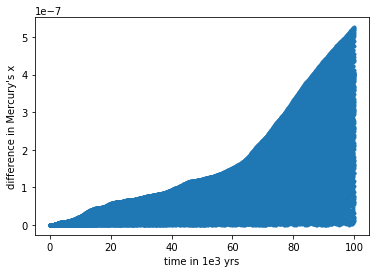

In [17]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.xlabel("time in 1e3 yrs")
plt.ylabel("difference in Mercury's x")
plt.plot(times/(365.e3),abs(new_x-old_x),'.')
plt.show()

In [18]:
print new_x-old_x

[  5.55111512e-17  -3.43058915e-14   8.85957974e-14 ...,   3.95704374e-07
  -4.07785768e-07   3.17370453e-08]
